<a href="https://colab.research.google.com/github/DataWhizAnushka/ds_assignments/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **K-NEARTEST NIGHBOURS**

 1: Analyze the Data using Visualizations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('Zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


In [ ]:
print(data.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

In [ ]:
# Filter out non-numeric columns
numeric_data = data.select_dtypes(include=[float, int])


In [ ]:
# Compute the correlation matrix
corr_matrix = numeric_data.corr()


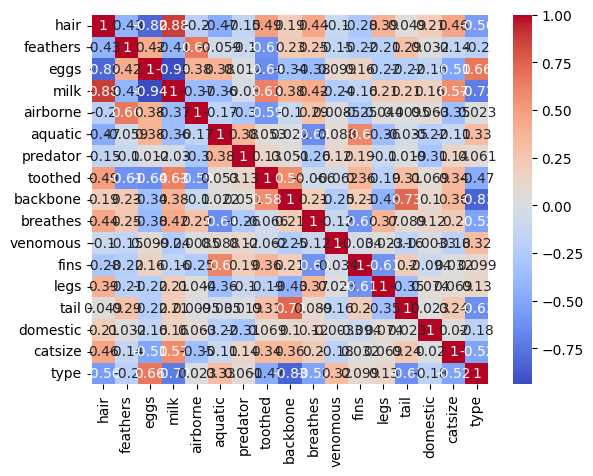

In [ ]:
# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

 2: Preprocess the Data by Handling Missing Values & Outliers


In [ ]:
# Check for missing values
print(data.isnull().sum())


animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [ ]:
# Handle missing values (if any)
data = data.dropna()  # Alternatively, you can use data.fillna(method='ffill') or similar methods


In [ ]:
# Detecting outliers using the IQR method
# Select only numerical columns
numerical_data = data.select_dtypes(include=['number'])

Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Filtering out outliers
filtered_data = numerical_data[~((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)]
# I want to keep only the rows in the original 'data' DataFrame corresponding to the non-outlier numerical values:
data = data.loc[filtered_data.index]

In [ ]:
# Verify no missing values and outliers
print(data.isnull().sum())
print(data.describe())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64
            hair  feathers       eggs       milk  airborne    aquatic  \
count  33.000000      33.0  33.000000  33.000000      33.0  33.000000   
mean    0.818182       0.0   0.212121   0.818182       0.0   0.151515   
std     0.391675       0.0   0.415149   0.391675       0.0   0.364110   
min     0.000000       0.0   0.000000   0.000000       0.0   0.000000   
25%     1.000000       0.0   0.000000   1.000000       0.0   0.000000   
50%     1.000000       0.0   0.000000   1.000000       0.0   0.000000   
75%     1.000000       0.0   0.000000   1.000000       0.0   0.000000   
max     1.000000       0.0   1.000000   1.000000       0.0   1.000000   

        predator    too

3: Split the Dataset into Training and Testing Sets

In [ ]:
# Define features and target variable
# Assuming the last column is the target column
target_column = data.columns[-1]
X = data.drop(columns=[target_column])
y = data[target_column]

# Convert categorical target variable to numeric if needed
y = pd.factorize(y)[0]

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')


Training set size: 26
Testing set size: 7


4: Implement the K-Nearest Neighbours Algorithm


5: Choose an Appropriate Distance Metric and Value for K

- The default distance metric for KNN is Euclidean, but you can experiment with others like Manhattan or Minkowski.

6: Evaluate the Classifier's Performance


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

try:
    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)  # You can start with K=5

    # Train the classifier
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')
    print(classification_report(y_test, y_pred))
except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: could not convert string to float: 'platypus'


In [ ]:
# Predict classifications for each point in the mesh
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot also the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', marker='o')
plt.title('KNN Decision Boundaries with 2D PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

NameError: name 'knn_pca' is not defined